Redes neurais artificiais
=========================



## Introdução



Nossa classe `Valor` já faz tudo que precisamos para usarmos ela como suporte para construirmos uma rede neural. Neste notebook iremos construir uma rede neural por partes, primeiramente criando um neurônio artificial, depois uma camada de neurônios e, por fim, uma rede neural multicamadas.



## Objetivo



Criar uma rede neural artificial usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### O neurônio artificial



Vamos construir um neurônio artificial. Como iremos ter vários neurônios em uma rede neural, podemos construir uma classe que servirá de receita para criar esses neurônios. Lembre-se que um neurônio artificial recebe informação de sinapses artificiais ponderadas, soma estas informações, adiciona um viés à esta soma, aplica uma função de ativação e, finalmente, passa a informação adiante.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."
        
        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p
            
        soma = soma + self.vies #estamos adicionando o vies.
        dado_de_saida = soma.sig()
        return dado_de_saida

Vamos fazer um teste simples do nosso neurônio artificial.



In [3]:
dados_de_entrada = [2.5, 4.25]

meu_neuronio = Neuronio(len(dados_de_entrada))

print(meu_neuronio(dados_de_entrada))

Valor(data=0.6626009766307825)


### A camada de neurônios



Uma rede neural artificial com apenas um neurônio é um modelo relativamente simples. As redes neurais artificias costumam ser mais interessantes com mais neurônios. O motivo para isso é que com mais neurônios nós conseguimos identificar padrões mais complexos nos dados na tentativa de induzir um modelo preditivo melhor.

Uma estrutura de organização de neurônios artificiais são as `camadas de neurônios`. Uma camada de neurônio é um conjunto de neurônios onde cada neurônio é independente (tem seu próprio conjunto de pesos e viés), porém recebe a mesma informação. A quantidade de informação recebida estará representada no argumento `num_dados_entrada` abaixo. Assim como o neurônio artificial, uma camada de neurônios será modelada usando uma classe.



In [4]:
class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas

Vamos fazer um teste simples da nossa camada de neurônios artificiais.



In [5]:
dados_de_entrada = [2.5, 4.25]
num_neuronios = 3

minha_camada = Camada(len(dados_de_entrada), num_neuronios)

print(minha_camada(dados_de_entrada))

[Valor(data=0.554196742388829), Valor(data=0.07213055371439041), Valor(data=0.01276820959491786)]


### A rede neural Multilayer Perceptron (MLP)



Uma rede neural artificial composta de uma ou mais camadas ocultas de neurônios (isto é, camadas que não sejam camadas de entrada ou camadas de saída) é chamada de Multilayer Perceptron ou simplesmente `MLP`.

A informação em uma rede MLP flui da esquerda para a direita, iniciando na camada de entrada, passando por todas as camadas ocultas (uma a uma, na ordem) e saindo na camada de saída. A informação em uma MLP nunca retorna, apenas segue em frente. Por conta disso, MLPs também são chamadas de `feedforward networks`, ou seja, redes neurais que sempre propagam &ldquo;para frente&rdquo; a informação. Existem outros tipos de redes neurais que não são `feedforward`, porém estas não serão vistas neste curso.

Como você provavelmente já estava esperando, usaremos uma classe para servir como receita para criar nossas redes MLP.



In [6]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x

Vamos fazer um teste simples da nossa rede MLP.



In [9]:
dados_de_entrada = [2.5, 4.25]
num_neuronios_por_camada = [2, 2, 2, 2, 1]

minha_mlp = MLP(len(dados_de_entrada), num_neuronios_por_camada)

resultado = minha_mlp(dados_de_entrada)

print(resultado)

Valor(data=0.18753568145326804)


Observe que nosso `resultado` é uma instância da classe `Valor`! O que nós podemos fazer com instâncias desta classe? Sim, podemos computar o gradiente local usando nosso algoritmo de `autograd` e plotar o grafo computacional!!



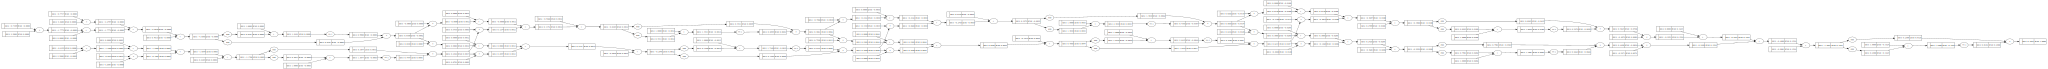

In [10]:
resultado.propagar_tudo()
grafo = plota_grafo(resultado)

# para salvar o grafo
grafo.render("rede_neural", format="png")

grafo

## Conclusão



Nesse notebook, fizemos a construção de um protótipo do que virá a ser, de fato, uma rede neural. Nele, retomamos os conceitos e os princípios de redes neurais artificiais:
- Inputs: São as entradas que chegam ao neurônio em questão. Dados numéricos vindos de outros neurônios da camada imediatamente anterior (no caso da primeira camada, os inputs são dados), que já fizeram todo o papel de processamento matemático.
- Weight: São valores que multiplicarão os inputs dos neurônios da camada anterior. Isso garante que um mesmo neurônio interagirá de maneira complexa com seus antecessores, e também uma certa diferença de importância de cada input.
- Viés: O viés serve para dar uma guiada na função de ativação, jogando os valores para o lado mais positivo ou negativo, também podendo ser usado para inativar ou ativar neurônios quando se usam funções "ReLU".
- Função Somatória: Função que soma todos os inputs com seus respectivos pesos com o viés.
- Função de Ativação: O cálculo matemático singular do neurônio, que irá gerar seu valor de saída.

Também foi desenvolvido o conceito de rede neural MultiLayer Perceptron, que é justamente o modelo mais comum de redes neurais: vários neurônios em várias camadas diferentes que se relacionam de maneira aleatória para resolverem problemas complexos.

## Playground

